# Softmax and Cross-Entropy

This time we will talk about softmax and cross-entropy. These are some of the most common functions found in neural networks. We will learn the math about the functions and how to use them in `numpy` and `pytorch`. In the end, we will see how a typical classification neural network with these functions looks like.

The formula for the softmax activation fuction:

$$ S(y_{i}) = \frac{e^{y_{i}}}{\Sigma e^{y_{j}}} $$

It applies the exponential function to each element and normalizes it by dividing by the sum of all the exponentials. This squashes the output to be between 0 and 1, so we get probabilities.

What does softmax activation function do? Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. Similar to the sigmoid activation function the SoftMax function returns the probability of each class. 

As an example, a the softmax layer looks like: 

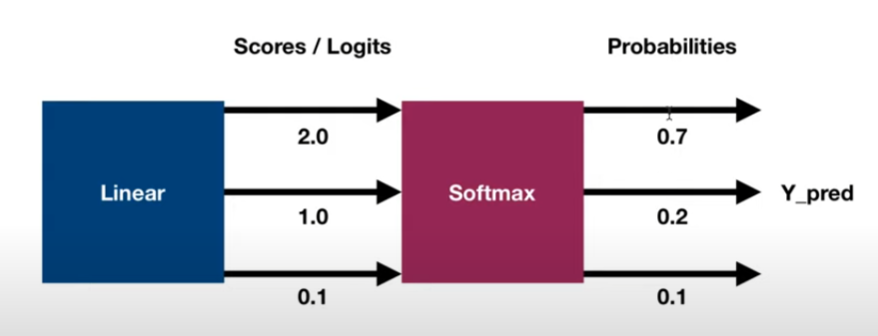

So, we have a linear layer with 3 output values. The values are scores/logits; they are raw values. When we apply the softmax, we get probabilities between 0 and 1. The highest value gets the highest probability. If we sum these 3 probabilities, then we get 1. Then, our prediction will be the class with the highest probability, which in this case is 0.7.

Now, let's implement the softmax activation function. But first, let's import some modules.

In [1]:
import torch
import torch.nn as nn
import numpy as np

Now, let's code the softmax activation function in `numpy`.

In [3]:
#defining the function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

#creating an array of values
x = np.array([2.0, 1.0, 0.1])

#applying the function
outputs = softmax(x)
print('softmax numpy:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


As we can see, the highest score (2) has the highest probability (0.7 rounded up). So, we that it is correct. Now, we will calculate it in `pytorch`.

In [4]:
#creating a tensor of values
x = torch.tensor([2.0, 1.0, 0.1])

#calculating the values after applying the softmax function - we need to specify the dimensions - this computes it
#along the first axis
outputs = torch.softmax(x, dim = 0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


As we can see, the results are nearly identical to when we calculated it using `numpy`. 

A lot times the soft max function is combined with the cross-entropy loss. This cross-entropy loss measures the performance of our classification model who has an output of a probability between 0 and 1. It can be used in multi-class problems. The loss increases as the predicted probability diverges from the actual label (probability). The better our prediction, the lower our loss. Below, we have 2 examples. The first is a good prediction with low loss and the second is a bad prediction with higher loss.

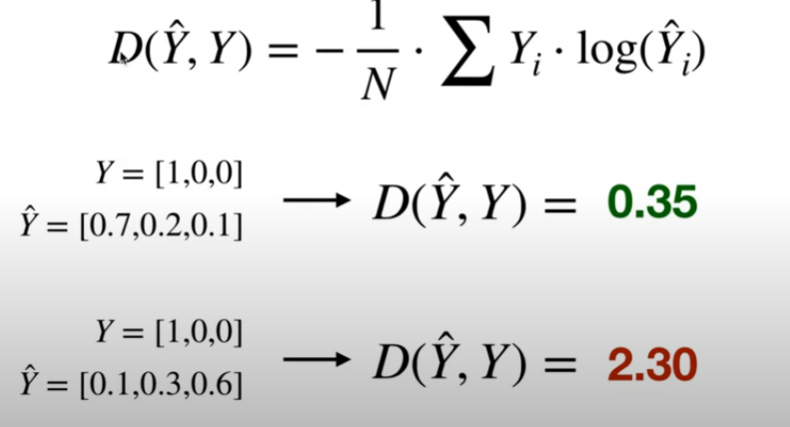

What we also must know is that, in this case, our `Y` has to be one-hot encoded. Let's say we have 3 possible classes, the correct label must be 1 and the rest are 0. This is the same as dummy coding. For the predicted `Y`, we must have probabilities. 

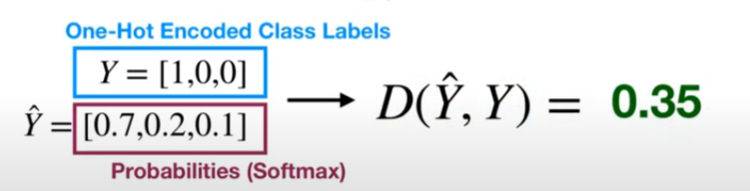

Now, let's have a look at the code of how we do this in `numpy`.

In [8]:
#defining the loss
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0]) - this would normalize it - divide it by the number of samples

#our y will be one-hot encoded
#if class 0: [1 0 0]
#if class 1: [0 1 0]
#if class 2: [0 0 1]

#creating our Y
Y = np.array([1, 0, 0])

#y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

#loss calculation
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

#displaying the loss
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


As we can see, the first prediction has a low loss and the second prediction has a high loss. Now, let's see how we do this in `pytorch`. As a note, we have to be careful because  `nn.CrossEntropyLoss()` applies `nn.LogSoftmax + nn.NLLLoss` (negative log likelihood loss).

This means we should not implement the softmax later ourselves in the last layer. Additionally, our Y must not be one-hot encoded (only put correct class label) and the y predictions has raw scores (no softmax activation function).

In [14]:
#creating the loss
loss = nn.CrossEntropyLoss()

#creating our actual labels
Y = torch.tensor([0])

#predicted ys
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #we have to be careful about the size, it is the n samples * n classes = 1x3
#remember, these are the raw values, not softmax
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

print(Y_pred_good)

#computing loss
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

#displaying the results
print(l1.item()) #only has one value, so we can call .item()
print(l2.item())

tensor([[2.0000, 1.0000, 0.1000]])
0.4170299470424652
1.840616226196289


As we can see, the first loss is low for the good prediction and it is higher for the bad prediction. To get the actual predictions, we can do it using the code below. As a note, more can be read about underscores in `Python` here: https://www.datacamp.com/tutorial/role-underscore-python

In [19]:
_, predictions1 = torch.max(Y_pred_good, 1) #in this case, we will be using the underscore to ignore values
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1, predictions2)

tensor([0]) tensor([1])


So, in the good prediction case we choose index 0, which is correct, and in the bad prediction case, we choose class 1, which is not correct. 

The loss in `pytroch` allows for multiple samples.

In [21]:
#creating the loss
loss = nn.CrossEntropyLoss()

#3 samples - 3 possible classes - our actual Y tensor must have 3 possible classes
Y = torch.tensor([2, 0 , 1])

#our predictions must be of size 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) #we have to be careful about the size, it is the n samples * n classes = 3x3
#remember, these are the raw values, not softmax
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

print(Y_pred_good)

#computing loss
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

#displaying the results
print(l1.item()) #only has one value, so we can call .item()
print(l2.item())

#printing predictions
_, predictions1 = torch.max(Y_pred_good, 1) #in this case, we will be using the underscore to ignore values
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1, predictions2)

tensor([[0.1000, 1.0000, 2.1000],
        [2.0000, 1.0000, 0.1000],
        [0.1000, 3.0000, 0.1000]])
0.3018244206905365
1.6241613626480103
tensor([2, 0, 1]) tensor([0, 2, 1])


As we can see, the loss for our good predictions is low and the loss for our bad predictions is high. Additionally, the good predictions match the actual `y` while the bad predictions do not. This is how we can calculate cross-entropy loss in `pytorch`.

Now, let's see how a typical neural network looks like. This will be a multi-class classification problem demonstrated by a simple example. In this case, the neural network will be predicting which animal is presented.

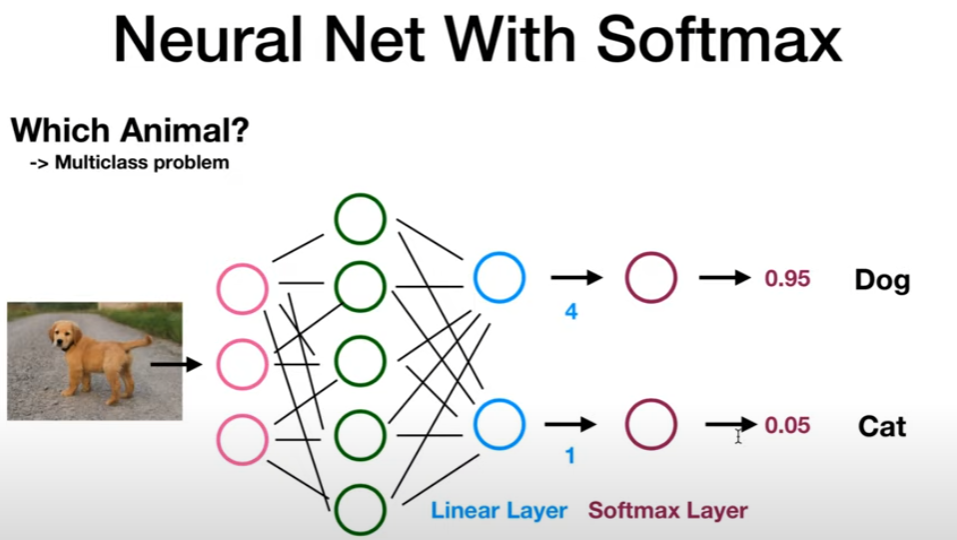

So, we have an input later, some hidden layers, and some activation functions in-between.At the end we have a linear layer with one output for each class. So, here we have 2 outputs. At the very end, we apply our softmax and get the probabilities. As we said earlier, we must be careful in `pytorch` since are using `nn.CrossEntropyLoss()`, so we must not use the softmax layer in our neural net - we should not implement it ourselves.

In [23]:
#multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)  #defining the linear layer which gets input and hidden size 
        self.relu = nn.ReLU() #activation function in-between 
        self.linear2 = nn.Linear(hidden_size, num_classes)  #the last layer gets the hidden size and the output size
        #is the number of classes - so, for each possible class, we get one output
    
    def forward(self, x): #here we only apply our layers and no softmax in the end
        out = self.linear1(x) 
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

#creating our model
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
#defining the loss 
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

However, we can rephrase our question to a binary classification problem with 2 possible outputs to: to is it a dog or not?

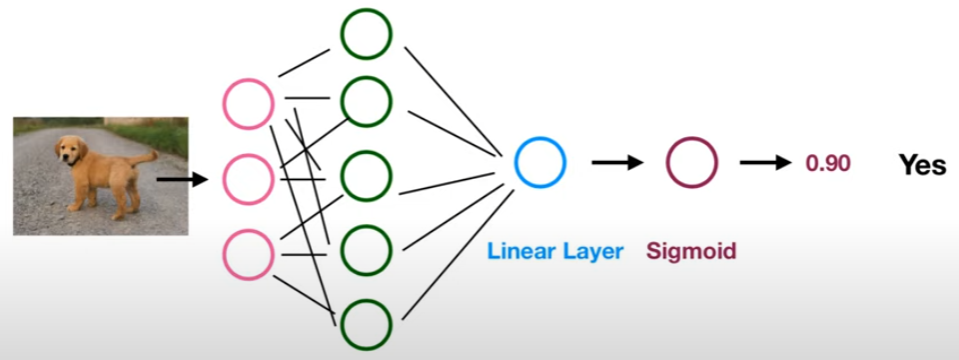

Here, at the end we have a linear layer with 1 output. We do not use the softmax function, but the sigmoid function, which makes it a probability. If it is higher than 0.5, then it is a dog. Here, in `pytorch`, we use the `nn.BCELoss()`. Here, we must implement the sigmoid function at the end. 

In [25]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__() 
        self.linear1 = nn.Linear(input_size, hidden_size) #layer  
        self.relu = nn.ReLU() #activation function 
        self.linear2 = nn.Linear(hidden_size, 1)  #layer with an output of size 1 - this is always fixed in a binary
        #classification problem
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end - must be implemented at the end
        y_pred = torch.sigmoid(out)
        return y_pred

#defining the model
model = NeuralNet1(input_size=28*28, hidden_size=5)
#using binary cross entropy loss 
criterion = nn.BCELoss()